<a href="https://colab.research.google.com/github/usshaa/Colabnb/blob/main/Feed_Forward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Classification using synthetic data (based on XOR logic)

| **Concept**              | **Where It Appears**                        | **Explanation**                                      |
| ------------------------ | ------------------------------------------- | ---------------------------------------------------- |
| **Feed Forward Network** | `Sequential([...])`                         | Layers are stacked in order: input → hidden → output |
| **Input Layer**          | `input_shape=(2,)` in first `Dense` layer   | Accepts 2 features (XOR inputs)                      |
| **Hidden Layer**         | `Dense(4, activation='relu')`               | Applies ReLU activation for non-linearity            |
| **Output Layer**         | `Dense(1, activation='sigmoid')`            | Binary output (0 or 1) using Sigmoid                 |
| **Activation Functions** | `activation='relu'`, `activation='sigmoid'` | ReLU in hidden, Sigmoid in output                    |
| **Loss Function**        | `BinaryCrossentropy()`                      | Binary classification loss                           |
| **Optimizer**            | `Adam(learning_rate=0.01)`                  | Adaptive optimizer                                   |
| **Back Propagation**     | `model.fit()`                               | Automatically handled by TensorFlow                  |
| **Loss Curve Plot**      | `plt.plot(history.history['loss'])`         | Visualizing training performance                     |


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt

In [2]:
# 1. Input data (XOR Problem - Non-linear)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [3]:
# 2. Build Feed Forward Neural Network
model = Sequential([
    Dense(4, input_shape=(2,), activation='relu'),     # Hidden layer
    Dense(1, activation='sigmoid')                     # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 3. Compile model (choose loss function & optimizer)
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

In [5]:
# 4. Train the model
history = model.fit(X, y, epochs=500, verbose=0)

In [6]:
# 5. Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 1.0000 - loss: 0.0184

Test Accuracy: 100.00%


In [7]:
# 6. Make predictions
predictions = model.predict(X)
print("\nPredictions:")
for i, pred in enumerate(predictions):
    print(f"Input: {X[i]} => Prediction: {pred[0]:.4f} (Actual: {y[i][0]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Predictions:
Input: [0. 0.] => Prediction: 0.0545 (Actual: 0.0)
Input: [0. 1.] => Prediction: 0.9928 (Actual: 1.0)
Input: [1. 0.] => Prediction: 0.9929 (Actual: 1.0)
Input: [1. 1.] => Prediction: 0.0030 (Actual: 0.0)


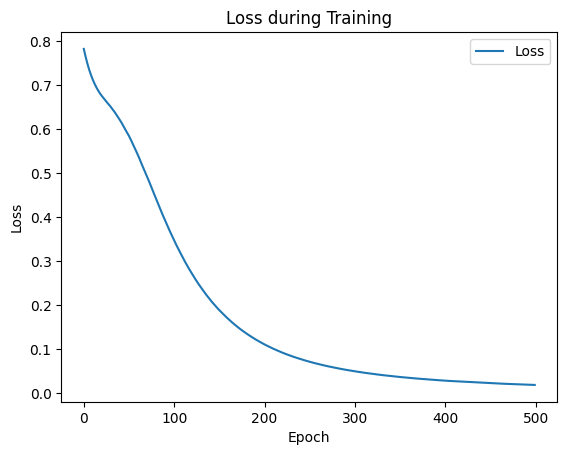

In [8]:
# 7. Plot the loss curve
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during Training')
plt.legend()
plt.show()